### Notebook to learn how to implement the EI in our problem

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction
from sklearn import gaussian_process as gp
from sklearn.preprocessing import StandardScaler

The model that we pass to the EI algorithm computes the number of leisure trips in negative since the EI aims at maximizing intead of minimizing to find the vulnerable cases

In [24]:
#After optimization
###### Load data
with open('Data/Xtest40_4.pickle', 'rb') as file:
    X_test = pickle.load(file)

In [25]:
### If you don't want to run the optimization
###### Load data
import pickle
with open('Data/X_EI_women.pickle', 'rb') as handle:
    x_obs = pickle.load(handle)
with open('Data/Y_EI_women.pickle', 'rb') as handle:
    y_obs = pickle.load(handle)

 ### Plots

In [26]:
y_obs = -y_obs

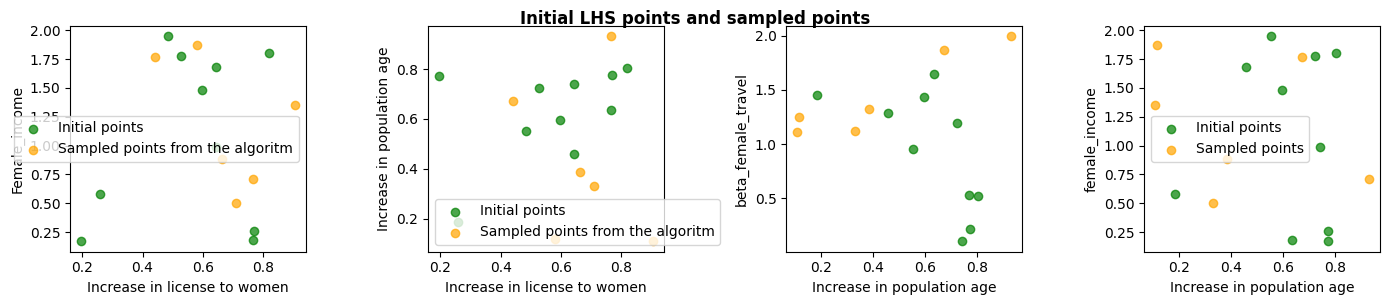

In [27]:
Initial = 10
fig, axes = plt.subplots(1, 4, figsize=(14, 3))
axes[0].scatter(x_obs[:Initial,0], x_obs[:Initial,3], c='green', label = 'Initial points', alpha =0.7)
axes[0].scatter(x_obs[Initial:,0], x_obs[Initial:,3], c='orange', label = 'Sampled points from the algoritm', alpha =0.7)
axes[0].set_xlabel('Increase in license to women')
axes[0].set_ylabel('Female_income')
axes[0].legend()
axes[1].scatter(x_obs[:Initial,0], x_obs[:Initial,1], c='green', label = 'Initial points', alpha =0.7)
axes[1].scatter(x_obs[Initial:,0], x_obs[Initial:,1], c='orange', label = 'Sampled points from the algoritm', alpha =0.7)
axes[1].set_xlabel('Increase in license to women')
axes[1].set_ylabel('Increase in population age')
axes[1].legend()
axes[2].scatter(x_obs[:Initial,1], x_obs[:Initial,2], c='green', label = 'Initial points', alpha =0.7)
axes[2].scatter(x_obs[Initial:,1], x_obs[Initial:,2], c='orange', label = 'Sampled points from the algoritm', alpha =0.7)
axes[2].set_xlabel('Increase in population age')
axes[2].set_ylabel('beta_female_travel')
axes[3].scatter(x_obs[:Initial,1], x_obs[:Initial,3], c='green', label = 'Initial points', alpha =0.7)
axes[3].scatter(x_obs[Initial:,1], x_obs[Initial:,3], c='orange', label = 'Sampled points', alpha =0.7)
axes[3].set_xlabel('Increase in population age')
axes[3].set_ylabel('female_income')
axes[3].legend()
plt.tight_layout()
fig.suptitle('Initial LHS points and sampled points', fontsize=12, fontweight='bold', y=1)
plt.show()

In [28]:
percentil_20 = np.percentile(y_obs, 20)
percentil_20

183403.0

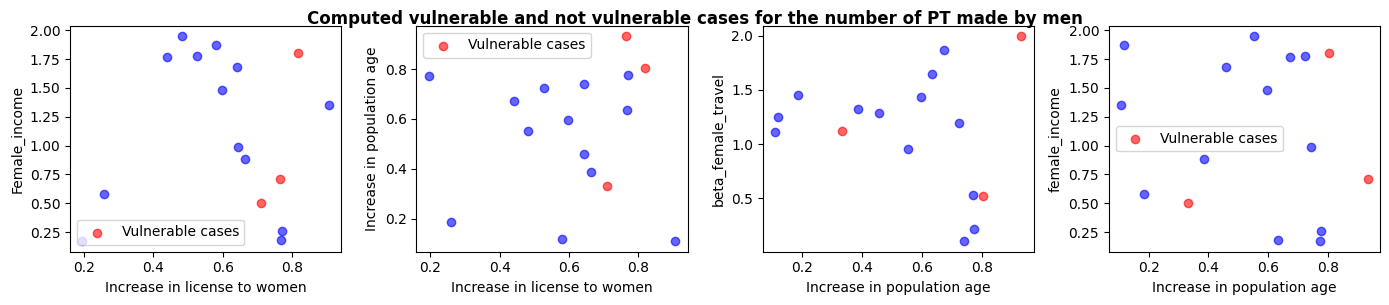

In [29]:
percentil_20 = np.percentile(y_obs, 20)
Y_mask= y_obs < percentil_20
fig, axes = plt.subplots(1, 4, figsize=(14, 3))

axes[0].scatter(x_obs[~Y_mask,0], x_obs[~Y_mask,3], c='blue', alpha=0.6)
axes[0].scatter(x_obs[Y_mask,0], x_obs[Y_mask,3], c='red', label= 'Vulnerable cases', alpha=0.6)
axes[0].set_xlabel('Increase in license to women')
axes[0].set_ylabel('Female_income')
axes[0].legend()
axes[1].scatter(x_obs[~Y_mask,0], x_obs[~Y_mask,1], c='blue' , alpha=0.6)
axes[1].scatter(x_obs[Y_mask,0], x_obs[Y_mask,1], c='red', label= 'Vulnerable cases', alpha=0.6)
axes[1].set_xlabel('Increase in license to women')
axes[1].set_ylabel('Increase in population age')
axes[1].legend()
axes[2].scatter(x_obs[~Y_mask,1], x_obs[~Y_mask,2], c='blue' , alpha=0.6)
axes[2].scatter(x_obs[Y_mask,1], x_obs[Y_mask,2], c='red', label= 'Vulnerable cases' , alpha=0.6)
axes[2].set_xlabel('Increase in population age')
axes[2].set_ylabel('beta_female_travel')
axes[3].scatter(x_obs[~Y_mask,1], x_obs[~Y_mask,3], c='blue' , alpha=0.6)
axes[3].scatter(x_obs[Y_mask,1], x_obs[Y_mask,3], c='red', label= 'Vulnerable cases' , alpha=0.6)
axes[3].set_xlabel('Increase in population age')
axes[3].set_ylabel('female_income')
axes[3].legend()
plt.tight_layout()
fig.suptitle('Computed vulnerable and not vulnerable cases for the number of PT made by men', fontsize=12, fontweight='bold', y=1)
plt.show()

### Compute the posterior

In [30]:
y_obs

array([183614., 183403., 184276., 183989., 184034., 184536., 183781.,
       183811., 183676., 183329., 183329., 184202., 183239., 183987.,
       183479., 183600.])

In [31]:
import numpy as np
import pandas as pd
import subprocess
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

### If you don't want to run the optimization
###### Load data
import pickle
with open('Data/X_EI_women.pickle', 'rb') as handle:
    x_obs = pickle.load(handle)
with open('Data/Y_EI_women.pickle', 'rb') as handle:
    y_obs = pickle.load(handle)

# Definir los parámetros que quieres ajustar y sus posibles valores
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None,10,20]
}

# Inicializar el clasificador Random Forest
rf_clf = RandomForestRegressor(random_state=42)

# Inicializar GridSearchCV
grid_search = GridSearchCV(rf_clf, param_grid, cv=3)

# Ajustar GridSearchCV para encontrar los mejores parámetros
grid_search.fit(x_obs, -y_obs)

# Obtener el mejor modelo
best_rf_model = grid_search.best_estimator_

# Acceder a los mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)


# Realizar predicciones con el mejor modelo
predictions = best_rf_model.predict(X_test)


Mejores parámetros: {'max_depth': None, 'n_estimators': 50}


In [32]:
percentil_20 = np.percentile(predictions, 20)
print( "Percentil 20:", percentil_20)
percentil_20_1 = np.percentile(-y_obs, 20)
print( "Percentil 20 obs:", percentil_20_1)

Percentil 20: 183624.144
Percentil 20 obs: 183403.0


In [33]:
Y= [1 if predictions[i] < percentil_20 else 0 for i in range(len(predictions))]
Y= np.array(Y).astype(float)
print("Number of vulnerable scenarios: ", sum(Y), " where the leasure trips are less than ", percentil_20, "in the whole population")

Number of vulnerable scenarios:  8.0  where the leasure trips are less than  183624.144 in the whole population


We plot the posterior in the 40 LHS points and apply PRIM

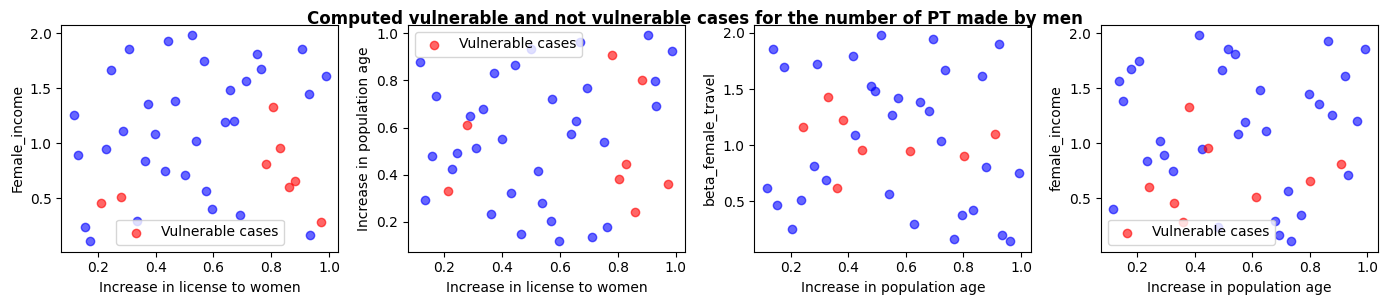

In [34]:
Y_mask= predictions < percentil_20
fig, axes = plt.subplots(1, 4, figsize=(14, 3))

axes[0].scatter(X_test[~Y_mask,0], X_test[~Y_mask,3], c='blue', alpha=0.6)
axes[0].scatter(X_test[Y_mask,0], X_test[Y_mask,3], c='red', label= 'Vulnerable cases', alpha=0.6)
axes[0].set_xlabel('Increase in license to women')
axes[0].set_ylabel('Female_income')
axes[0].legend()
axes[1].scatter(X_test[~Y_mask,0], X_test[~Y_mask,1], c='blue' , alpha=0.6)
axes[1].scatter(X_test[Y_mask,0], X_test[Y_mask,1], c='red', label= 'Vulnerable cases', alpha=0.6)
axes[1].set_xlabel('Increase in license to women')
axes[1].set_ylabel('Increase in population age')
axes[1].legend()
axes[2].scatter(X_test[~Y_mask,1], X_test[~Y_mask,2], c='blue' , alpha=0.6)
axes[2].scatter(X_test[Y_mask,1], X_test[Y_mask,2], c='red', label= 'Vulnerable cases' , alpha=0.6)
axes[2].set_xlabel('Increase in population age')
axes[2].set_ylabel('beta_female_travel')
axes[3].scatter(X_test[~Y_mask,1], X_test[~Y_mask,3], c='blue' , alpha=0.6)
axes[3].scatter(X_test[Y_mask,1], X_test[Y_mask,3], c='red', label= 'Vulnerable cases' , alpha=0.6)
axes[3].set_xlabel('Increase in population age')
axes[3].set_ylabel('female_income')
axes[3].legend()
plt.tight_layout()
fig.suptitle('Computed vulnerable and not vulnerable cases for the number of PT made by men', fontsize=12, fontweight='bold', y=1)
plt.show()

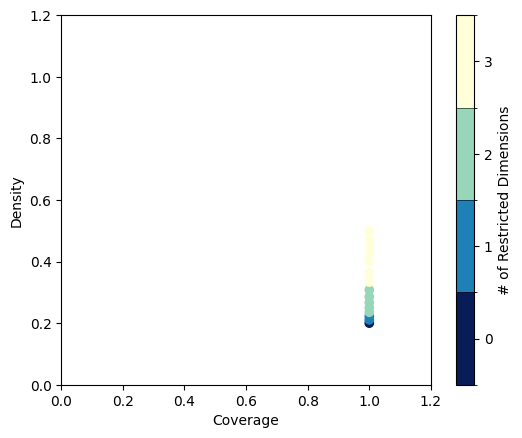

In [35]:
import prim
import pandas as pd
import matplotlib.pyplot as plt

p = prim.Prim(X_test, Y, threshold=0.3, threshold_type=">")

box = p.find_box()
box.show_tradeoff()

plt.show()

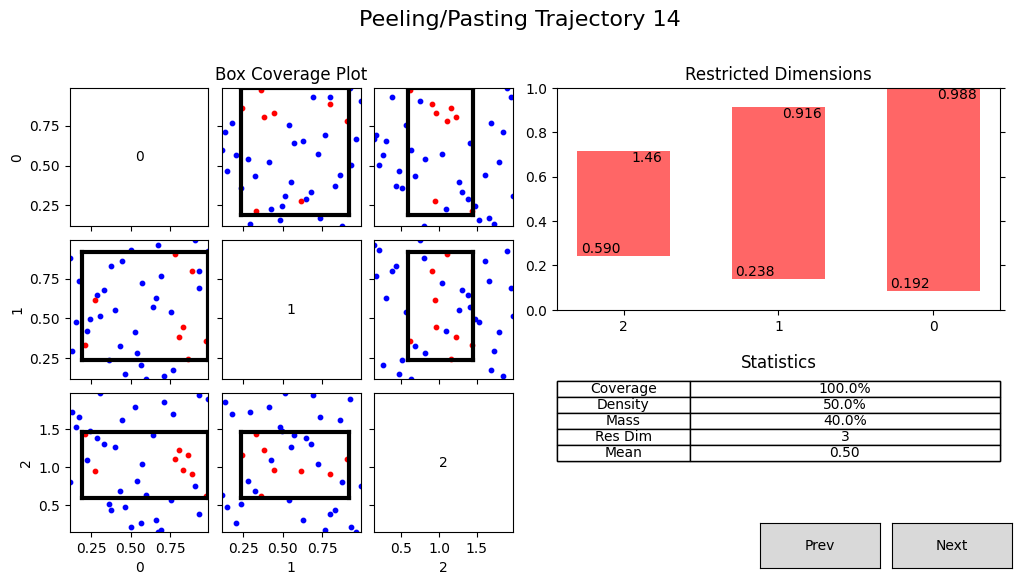

In [36]:
box.show_details()
plt.show()

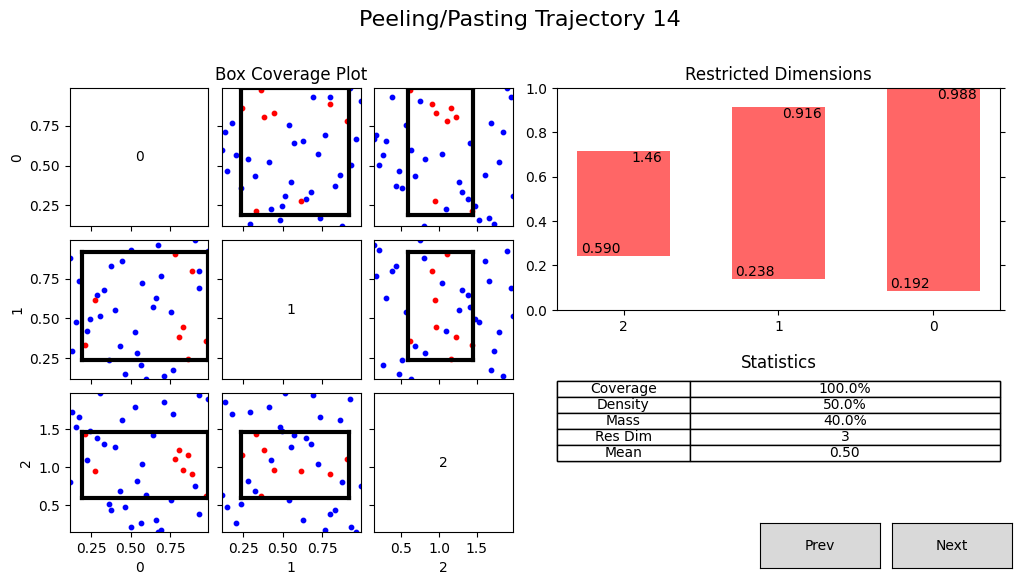

In [37]:
box_paste = p._paste(box)
box_paste.show_details()
plt.show()

In [38]:
box.select(15)
box.show_details()
plt.show()

IndexError: list index out of range